In [6]:
pip install aif360 pandas numpy matplotlib seaborn scikit-learn

In [7]:
# 📌 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# 📌 Step 2: Load dataset from the specified path
file_path = '/content/propublica_data_for_fairml.csv'
df = pd.read_csv(file_path)

# Preview the dataset
df.head()


,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,4,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0


In [9]:
# 📌 Step 3: Filter and preprocess data for fairness analysis
# The original dataset columns were: 'Two_yr_Recidivism', 'Number_of_Priors', 'score_factor', 'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic', 'Native_American', 'Other', 'Female', 'Misdemeanor'
# Based on the available columns, I will remove the filtering and binary column creation steps that rely on columns not present in the dataframe.
# I will keep the creation of 'race_binary' and 'predicted' based on the available 'African_American' and 'score_factor' columns respectively.
# I will also rename 'Two_yr_Recidivism' to 'two_year_recid' for consistency with the original code's variable names.

df = df[(df['African_American'] == 1) | (df['African_American'] == 0)] # Keep all rows as filtering by race is not needed with binary columns
df['two_year_recid'] = df['Two_yr_Recidivism'].astype(int)
df['race_binary'] = df['African_American'].apply(lambda x: 0 if x == 1 else 1) # 1 for Caucasian (African_American == 0), 0 for African-American (African_American == 1)
df['predicted'] = df['score_factor'].apply(lambda x: 1 if x == 1 else 0) # 1 for High (score_factor == 1), 0 for Low (score_factor == 0)


# Show transformed columns
df[['African_American', 'race_binary', 'score_factor', 'predicted', 'two_year_recid']].head()

,African_American,race_binary,score_factor,predicted,two_year_recid
0,0,1,0,0,0
1,1,0,0,0,1
2,1,0,0,0,1
3,0,1,0,0,0
4,0,1,1,1,1


In [10]:
# 📌 Step 4: Define False Positive Rate (FPR) function
def fpr(group):
    subset = df[df['race_binary'] == group]
    fp = len(subset[(subset['two_year_recid'] == 0) & (subset['predicted'] == 1)])
    tn = len(subset[(subset['two_year_recid'] == 0) & (subset['predicted'] == 0)])
    return fp / (fp + tn) if (fp + tn) != 0 else 0


In [11]:
# 📌 Step 5: Calculate FPR for African-American and Caucasian groups
fpr_black = fpr(0)
fpr_white = fpr(1)

print("False Positive Rate (African-American):", round(fpr_black, 3))
print("False Positive Rate (Caucasian):", round(fpr_white, 3))


False Positive Rate (African-American): 0.423
False Positive Rate (Caucasian): 0.204


/tmp/ipython-input-12-1032038485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['African-American', 'Caucasian'], y=[fpr_black, fpr_white], palette='Set2')


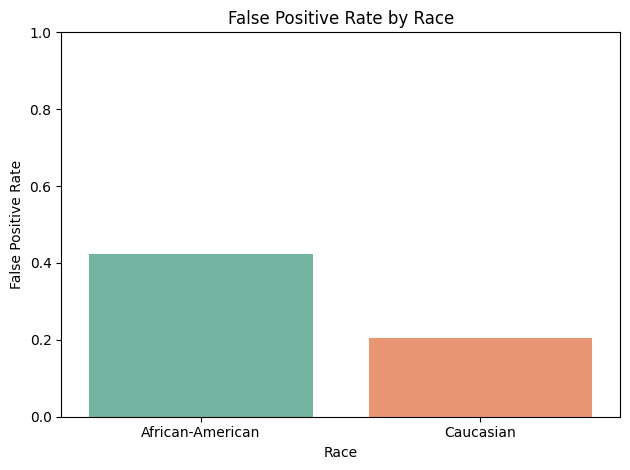

In [12]:
# 📌 Step 6: Visualize the False Positive Rate disparity
sns.barplot(x=['African-American', 'Caucasian'], y=[fpr_black, fpr_white], palette='Set2')
plt.title('False Positive Rate by Race')
plt.ylabel('False Positive Rate')
plt.xlabel('Race')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-1032038485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['African-American', 'Caucasian'], y=[fpr_black, fpr_white], palette='Set2')


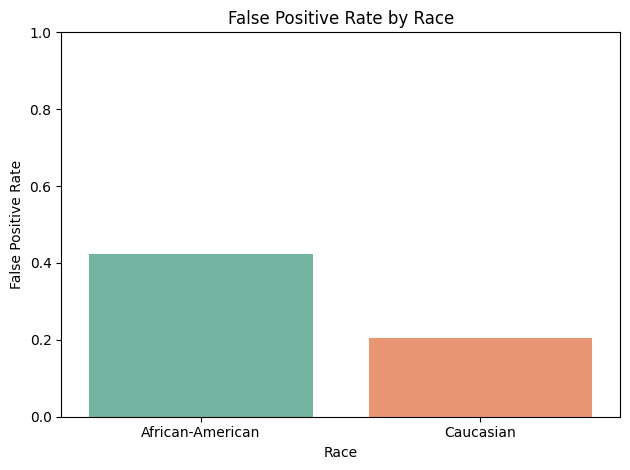

In [13]:
# 📌 Step 6: Visualize the False Positive Rate disparity
sns.barplot(x=['African-American', 'Caucasian'], y=[fpr_black, fpr_white], palette='Set2')
plt.title('False Positive Rate by Race')
plt.ylabel('False Positive Rate')
plt.xlabel('Race')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
